## Production Planning Project: **Phase 1**


### Details

Full Name: **Hamed Araab**

Student Number: **9925003**


### Dependencies


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Presets


In [9]:
groups = {"G1": ["M1", "M3", "M4"], "G2": ["M2", "M5"], "G3": ["M6"]}
methods = ["SES", "SMA", "WMA", "LR", "ALR"]
steps = 6
test_range = 5

### Dataset


In [10]:
df = pd.read_excel("./dataset.xlsx", usecols="B, E, H, K, N, Q")

for group, models in groups.items():
    df[f"{group} Actual"] = np.zeros(shape=(df.shape[0], 1))

    for model in models:
        df[f"{group} Actual"] += df[f"تقاضا (هزار دستگاه {model})"]
        df.drop(inplace=True, columns=[f"تقاضا (هزار دستگاه {model})"])


df = df.reindex(range(len(df) + steps), fill_value=None)

df

,G1 Actual,G2 Actual,G3 Actual
0,352.1,146.8,14.7
1,469.3,171.7,16.2
2,498.0,229.3,22.7
3,476.5,220.7,19.2
4,434.7,206.6,17.7
5,405.4,185.6,14.7
6,388.2,176.7,10.2
7,311.8,176.4,14.7
8,301.4,168.1,12.2
9,291.4,161.1,10.5


### Utility Functions


In [11]:
def plot_forecast(method):
    fig, axs = plt.subplots(1, len(groups.keys()), figsize=(20, 5))

    fig.suptitle(method)

    for index, group in enumerate(groups):
        ax = axs[index]

        ax.plot(
            df.index + 1,
            df[f"{group} Actual"],
            label="Actual",
            marker="o",
            color="blue",
        )

        ax.plot(
            df.index + 1,
            df[f"{group} Forecast ({method})"],
            label="Forecast",
            marker="x",
            color="red",
        )

        ax.set_xlabel("Month")
        ax.set_ylabel("Demand")

        ax.set_title(group)

        ax.legend()

    fig.savefig(f"./forecast_plots/{method}.jpg")

### Prediction Models


#### Simple Exponential Smoothing **(SES)**


##### Implementation


In [12]:
class SimpleExponentialSmoothing:
    def fit(self, historicalValues: list, alpha: float):
        self._fittedValues = [historicalValues[0]]

        for value in historicalValues:
            self._fittedValues.append(
                alpha * value + (1 - alpha) * self._fittedValues[-1]
            )

    @property
    def fittedValues(self):
        return self._fittedValues[:-1]

    def forecast(self, steps):
        return [self._fittedValues[-1] for _ in range(steps)]

##### Usage


In [13]:
alpha = 0.3

for group in groups:
    ses_model = SimpleExponentialSmoothing()

    ses_model.fit(df[f"{group} Actual"].to_list()[:-steps], alpha)

    df[f"{group} Forecast (SES)"] = [
        *ses_model.fittedValues,
        *ses_model.forecast(steps),
    ]

df

,G1 Actual,G2 Actual,G3 Actual,G1 Forecast (SES),G2 Forecast (SES),G3 Forecast (SES)
0,352.1,146.8,14.7,352.100000,146.800000,14.700000
1,469.3,171.7,16.2,352.100000,146.800000,14.700000
2,498.0,229.3,22.7,387.260000,154.270000,15.150000
3,476.5,220.7,19.2,420.482000,176.779000,17.415000
4,434.7,206.6,17.7,437.287400,189.955300,17.950500
5,405.4,185.6,14.7,436.511180,194.948710,17.875350
6,388.2,176.7,10.2,427.177826,192.144097,16.922745
7,311.8,176.4,14.7,415.484478,187.510868,14.905921
8,301.4,168.1,12.2,384.379135,184.177608,14.844145
9,291.4,161.1,10.5,359.485394,179.354325,14.050902


##### Plots


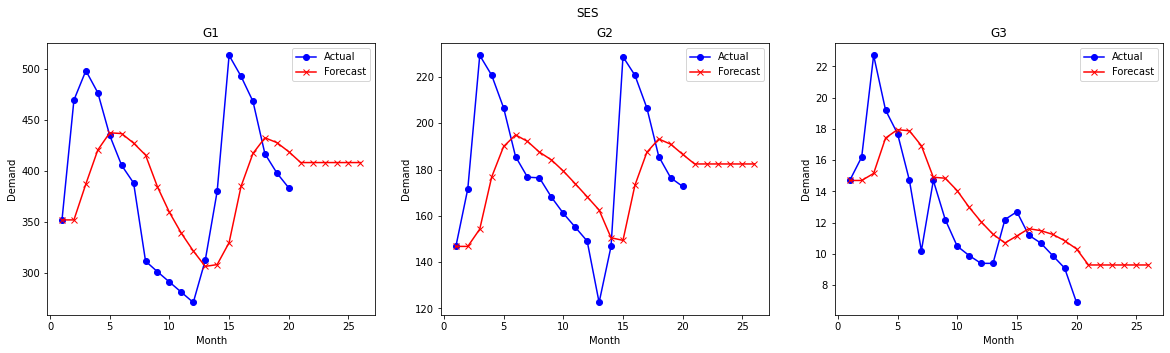

In [14]:
plot_forecast("SES")

##### Simple Moving Average **(SMA)**


##### Implementation


In [15]:
class SimpleMovingAverage:
    def fit(self, historicalValues: list, window: int):
        self._window = window
        self._fittedValues = historicalValues[: self._window]

        for index, _ in enumerate(historicalValues):
            if index < self._window:
                continue

            self._fittedValues.append(
                sum(historicalValues[index - self._window : index]) / self._window
            )

    @property
    def fittedValues(self):
        return self._fittedValues

    def forecast(self, steps):
        forecastValues = self._fittedValues[-self._window :]

        for _ in range(steps):
            forecastValues.append(sum(forecastValues[-self._window :]) / self._window)

        return forecastValues[self._window :]

##### Usage


In [16]:
window = 3

for group in groups:
    sma_model = SimpleMovingAverage()

    sma_model.fit(df[f"{group} Actual"].to_list()[:-steps], window)

    df[f"{group} Forecast (SMA)"] = [
        *sma_model.fittedValues,
        *sma_model.forecast(steps),
    ]

df

,G1 Actual,G2 Actual,G3 Actual,G1 Forecast (SES),G2 Forecast (SES),G3 Forecast (SES),G1 Forecast (SMA),G2 Forecast (SMA),G3 Forecast (SMA)
0,352.1,146.8,14.7,352.100000,146.800000,14.700000,352.100000,146.800000,14.700000
1,469.3,171.7,16.2,352.100000,146.800000,14.700000,469.300000,171.700000,16.200000
2,498.0,229.3,22.7,387.260000,154.270000,15.150000,498.000000,229.300000,22.700000
3,476.5,220.7,19.2,420.482000,176.779000,17.415000,439.800000,182.600000,17.866667
4,434.7,206.6,17.7,437.287400,189.955300,17.950500,481.266667,207.233333,19.366667
5,405.4,185.6,14.7,436.511180,194.948710,17.875350,469.733333,218.866667,19.866667
6,388.2,176.7,10.2,427.177826,192.144097,16.922745,438.866667,204.300000,17.200000
7,311.8,176.4,14.7,415.484478,187.510868,14.905921,409.433333,189.633333,14.200000
8,301.4,168.1,12.2,384.379135,184.177608,14.844145,368.466667,179.566667,13.200000
9,291.4,161.1,10.5,359.485394,179.354325,14.050902,333.800000,173.733333,12.366667


##### Plots


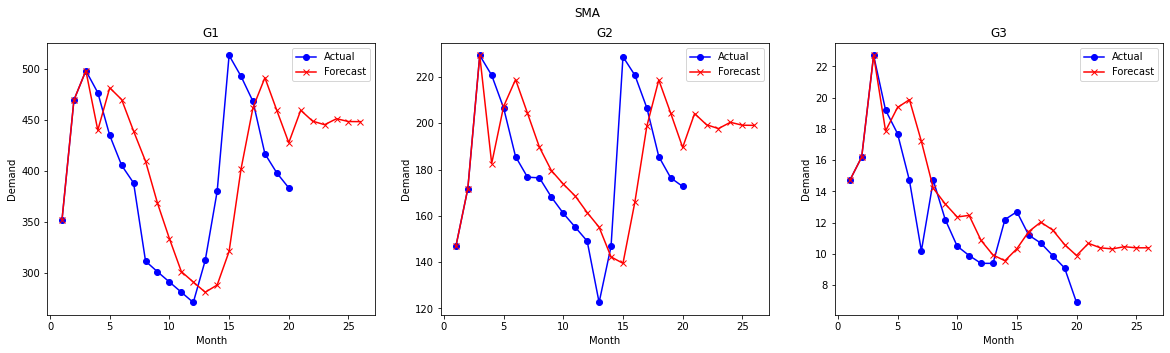

In [17]:
plot_forecast("SMA")

#### Weighted Moving Average **(WMA)**


##### Implementation


In [18]:
class WeightedMovingAverage:
    def fit(self, historicalValues: list, weights: list):
        self._weights = weights

        window = len(self._weights)

        self._fittedValues = historicalValues[:window]

        for index, _ in enumerate(historicalValues):
            if index < window:
                continue

            avg = 0

            for index, value in enumerate(historicalValues[index - window : index]):
                avg += value * self._weights[index]

            self._fittedValues.append(avg)

    @property
    def fittedValues(self):
        return self._fittedValues

    def forecast(self, steps):
        window = len(self._weights)
        forecastValues = self._fittedValues[-window:]

        for _ in range(steps):
            avg = 0

            for index, value in enumerate(forecastValues[-window:]):
                avg += value * self._weights[index]

            forecastValues.append(avg)

        return forecastValues[window:]

##### Usage


In [19]:
weights = [0.2, 0.3, 0.5]

for group in groups:
    wma_model = WeightedMovingAverage()

    wma_model.fit(df[f"{group} Actual"].to_list()[:-steps], weights)

    df[f"{group} Forecast (WMA)"] = [
        *wma_model.fittedValues,
        *wma_model.forecast(steps),
    ]

df

,G1 Actual,G2 Actual,G3 Actual,G1 Forecast (SES),G2 Forecast (SES),G3 Forecast (SES),G1 Forecast (SMA),G2 Forecast (SMA),G3 Forecast (SMA),G1 Forecast (WMA),G2 Forecast (WMA),G3 Forecast (WMA)
0,352.1,146.8,14.7,352.100000,146.800000,14.700000,352.100000,146.800000,14.700000,352.10000,146.800000,14.700000
1,469.3,171.7,16.2,352.100000,146.800000,14.700000,469.300000,171.700000,16.200000,469.30000,171.700000,16.200000
2,498.0,229.3,22.7,387.260000,154.270000,15.150000,498.000000,229.300000,22.700000,498.00000,229.300000,22.700000
3,476.5,220.7,19.2,420.482000,176.779000,17.415000,439.800000,182.600000,17.866667,460.21000,195.520000,19.150000
4,434.7,206.6,17.7,437.287400,189.955300,17.950500,481.266667,207.233333,19.366667,481.51000,213.480000,19.650000
5,405.4,185.6,14.7,436.511180,194.948710,17.875350,469.733333,218.866667,19.866667,459.90000,215.370000,19.150000
6,388.2,176.7,10.2,427.177826,192.144097,16.922745,438.866667,204.300000,17.200000,428.41000,198.920000,16.500000
7,311.8,176.4,14.7,415.484478,187.510868,14.905921,409.433333,189.633333,14.200000,402.66000,185.350000,13.050000
8,301.4,168.1,12.2,384.379135,184.177608,14.844145,368.466667,179.566667,13.200000,353.44000,178.330000,13.350000
9,291.4,161.1,10.5,359.485394,179.354325,14.050902,333.800000,173.733333,12.366667,321.88000,172.310000,12.550000


##### Plots


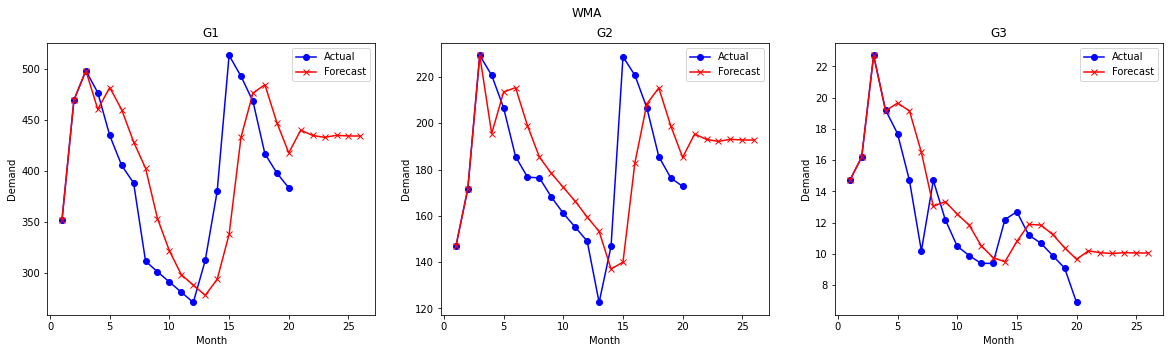

In [20]:
plot_forecast("WMA")

#### Linear Regression **(LR)**


In [21]:
for group in groups:
    lr_model = LinearRegression()

    lr_model.fit(
        np.array(df.index[:-steps]).reshape(-1, 1),
        np.array(df[f"{group} Actual"][:-steps]).reshape(-1, 1),
    )

    df[f"{group} Forecast (LR)"] = lr_model.predict(np.array(df.index).reshape(-1, 1))

df

,G1 Actual,G2 Actual,G3 Actual,G1 Forecast (SES),G2 Forecast (SES),G3 Forecast (SES),G1 Forecast (SMA),G2 Forecast (SMA),G3 Forecast (SMA),G1 Forecast (WMA),G2 Forecast (WMA),G3 Forecast (WMA),G1 Forecast (LR),G2 Forecast (LR),G3 Forecast (LR)
0,352.1,146.8,14.7,352.100000,146.800000,14.700000,352.100000,146.800000,14.700000,352.10000,146.800000,14.700000,395.830000,182.258571,17.584286
1,469.3,171.7,16.2,352.100000,146.800000,14.700000,469.300000,171.700000,16.200000,469.30000,171.700000,16.200000,395.457368,182.059248,17.071203
2,498.0,229.3,22.7,387.260000,154.270000,15.150000,498.000000,229.300000,22.700000,498.00000,229.300000,22.700000,395.084737,181.859925,16.558120
3,476.5,220.7,19.2,420.482000,176.779000,17.415000,439.800000,182.600000,17.866667,460.21000,195.520000,19.150000,394.712105,181.660602,16.045038
4,434.7,206.6,17.7,437.287400,189.955300,17.950500,481.266667,207.233333,19.366667,481.51000,213.480000,19.650000,394.339474,181.461278,15.531955
5,405.4,185.6,14.7,436.511180,194.948710,17.875350,469.733333,218.866667,19.866667,459.90000,215.370000,19.150000,393.966842,181.261955,15.018872
6,388.2,176.7,10.2,427.177826,192.144097,16.922745,438.866667,204.300000,17.200000,428.41000,198.920000,16.500000,393.594211,181.062632,14.505789
7,311.8,176.4,14.7,415.484478,187.510868,14.905921,409.433333,189.633333,14.200000,402.66000,185.350000,13.050000,393.221579,180.863308,13.992707
8,301.4,168.1,12.2,384.379135,184.177608,14.844145,368.466667,179.566667,13.200000,353.44000,178.330000,13.350000,392.848947,180.663985,13.479624
9,291.4,161.1,10.5,359.485394,179.354325,14.050902,333.800000,173.733333,12.366667,321.88000,172.310000,12.550000,392.476316,180.464662,12.966541


##### Plots


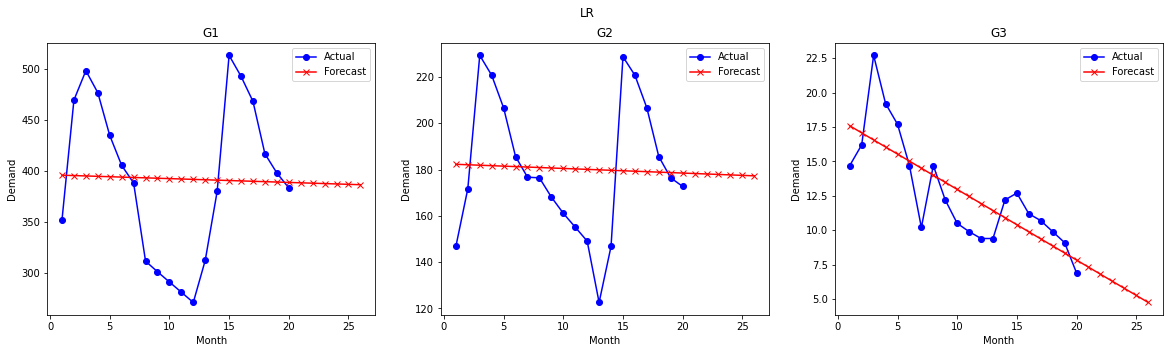

In [22]:
plot_forecast("LR")

#### Adjusted Linear Regression **(ALR)**


In [23]:
seasons_length = 12

for group in groups:
    ratio = df[f"{group} Actual"] / df[f"{group} Forecast (LR)"]

    for i in range(seasons_length):
        ratio[ratio.index % seasons_length == i] = ratio[:-steps][
            ratio[:-steps].index % seasons_length == i
        ].mean()

    df[f"{group} Forecast (ALR)"] = ratio * df[f"{group} Forecast (LR)"]

df

,G1 Actual,G2 Actual,G3 Actual,G1 Forecast (SES),G2 Forecast (SES),G3 Forecast (SES),G1 Forecast (SMA),G2 Forecast (SMA),G3 Forecast (SMA),G1 Forecast (WMA),G2 Forecast (WMA),G3 Forecast (WMA),G1 Forecast (LR),G2 Forecast (LR),G3 Forecast (LR),G1 Forecast (ALR),G2 Forecast (ALR),G3 Forecast (ALR)
0,352.1,146.8,14.7,352.100000,146.800000,14.700000,352.100000,146.800000,14.700000,352.10000,146.800000,14.700000,395.830000,182.258571,17.584286,334.085280,135.515172,14.582346
1,469.3,171.7,16.2,352.100000,146.800000,14.700000,469.300000,171.700000,16.200000,469.30000,171.700000,16.200000,395.457368,182.059248,17.071203,426.822969,160.227161,17.641170
2,498.0,229.3,22.7,387.260000,154.270000,15.150000,498.000000,229.300000,22.700000,498.00000,229.300000,22.700000,395.084737,181.859925,16.558120,508.436307,230.524012,21.458910
3,476.5,220.7,19.2,420.482000,176.779000,17.415000,439.800000,182.600000,17.866667,460.21000,195.520000,19.150000,394.712105,181.660602,16.045038,487.321661,222.172337,18.686954
4,434.7,206.6,17.7,437.287400,189.955300,17.950500,481.266667,207.233333,19.366667,481.51000,213.480000,19.650000,394.339474,181.461278,15.531955,454.033856,207.979807,17.713604
5,405.4,185.6,14.7,436.511180,194.948710,17.875350,469.733333,218.866667,19.866667,459.90000,215.370000,19.150000,393.966842,181.261955,15.018872,413.492525,186.840937,15.739125
6,388.2,176.7,10.2,427.177826,192.144097,16.922745,438.866667,204.300000,17.200000,428.41000,198.920000,16.500000,393.594211,181.062632,14.505789,395.386796,177.730740,13.005491
7,311.8,176.4,14.7,415.484478,187.510868,14.905921,409.433333,189.633333,14.200000,402.66000,185.350000,13.050000,393.221579,180.863308,13.992707,349.805020,175.707265,13.510873
8,301.4,168.1,12.2,384.379135,184.177608,14.844145,368.466667,179.566667,13.200000,353.44000,178.330000,13.350000,392.848947,180.663985,13.479624,301.400000,168.100000,12.200000
9,291.4,161.1,10.5,359.485394,179.354325,14.050902,333.800000,173.733333,12.366667,321.88000,172.310000,12.550000,392.476316,180.464662,12.966541,291.400000,161.100000,10.500000


##### Plots


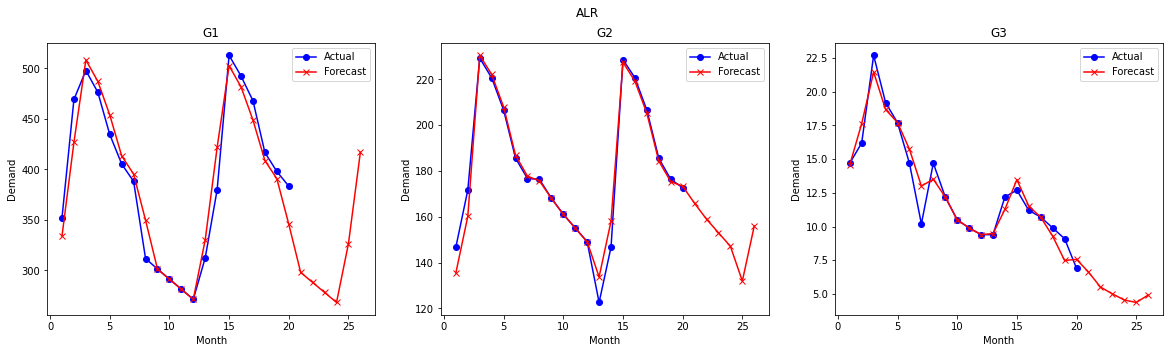

In [24]:
plot_forecast("ALR")

### Error Analysis


#### MFE & MAE


In [25]:
errors = {
    group: pd.DataFrame(
        {
            "MFE": {
                method: (
                    df[f"{group} Actual"][:-steps][-test_range:]
                    - df[f"{group} Forecast ({method})"][:-steps][-test_range:]
                ).mean()
                for method in methods
            },
            "MAE": {
                method: (
                    df[f"{group} Actual"][:-steps][-test_range:]
                    - df[f"{group} Forecast ({method})"][:-steps][-test_range:]
                )
                .abs()
                .mean()
                for method in methods
            },
        }
    )
    for group in groups
}

##### Group 1


In [26]:
errors["G1"]

,MFE,MAE
SES,15.572415,47.850271
SMA,-16.566667,55.300000
WMA,-19.948000,43.748000
LR,42.244737,44.384737
ALR,16.498470,16.498470


##### Group 2


In [27]:
errors["G2"]

,MFE,MAE
SES,6.136431,20.524845
SMA,-3.053333,28.066667
WMA,-5.720000,20.836000
LR,13.529925,16.746797
ALR,0.874537,1.147966


##### Group 3


In [28]:
errors["G3"]

,MFE,MAE
SES,-1.546784,1.546784
SMA,-1.540000,1.540000
WMA,-1.450000,1.450000
LR,0.698120,1.072406
ALR,0.250795,0.643623


#### Tracking Signals


In [29]:
tracking_signals = pd.DataFrame(
    {
        group: test_range * errors[group]["MFE"] / errors[group]["MAE"]
        for group in groups
    }
)

tracking_signals

,G1,G2,G3
SES,1.627202,1.494879,-5.000000
SMA,-1.497890,-0.543943,-5.000000
WMA,-2.279876,-1.372624,-5.000000
LR,4.758926,4.039556,3.254925
ALR,5.000000,3.809070,1.948311


### Output


In [30]:
with pd.ExcelWriter("./output.xlsx") as writer:
    df.to_excel(writer, sheet_name="Data")

    for group, error in errors.items():
        error.to_excel(writer, sheet_name=f"Errors - {group}")

    tracking_signals.to_excel(writer, sheet_name="Tracking Signals")